In [36]:
# load libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [30]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [3]:
df = pd.read_csv("C:/Users/Ark/0_ANALYSIS/DA_projects/Untitled Folder/avocado_data.csv")

In [4]:
df

,Date,AveragePrice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


In [17]:
#Moving average, window = 3
MA_3 = df.AveragePrice.rolling(window=3).mean()
MA_3

0           NaN
1           NaN
2      1.354352
3      1.386296
4      1.345093
         ...   
164    1.346914
165    1.361296
166    1.348302
167    1.332994
168    1.331883
Name: AveragePrice, Length: 169, dtype: float64

In [24]:
# max value of MA_3
round(MA_3.max(), 2)

1.85

In [25]:
# plot moving average with different windows

In [76]:
def get_plot(df, x_label='', y_label='', title=''):
    ax = df.plot()
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    sns.despine()

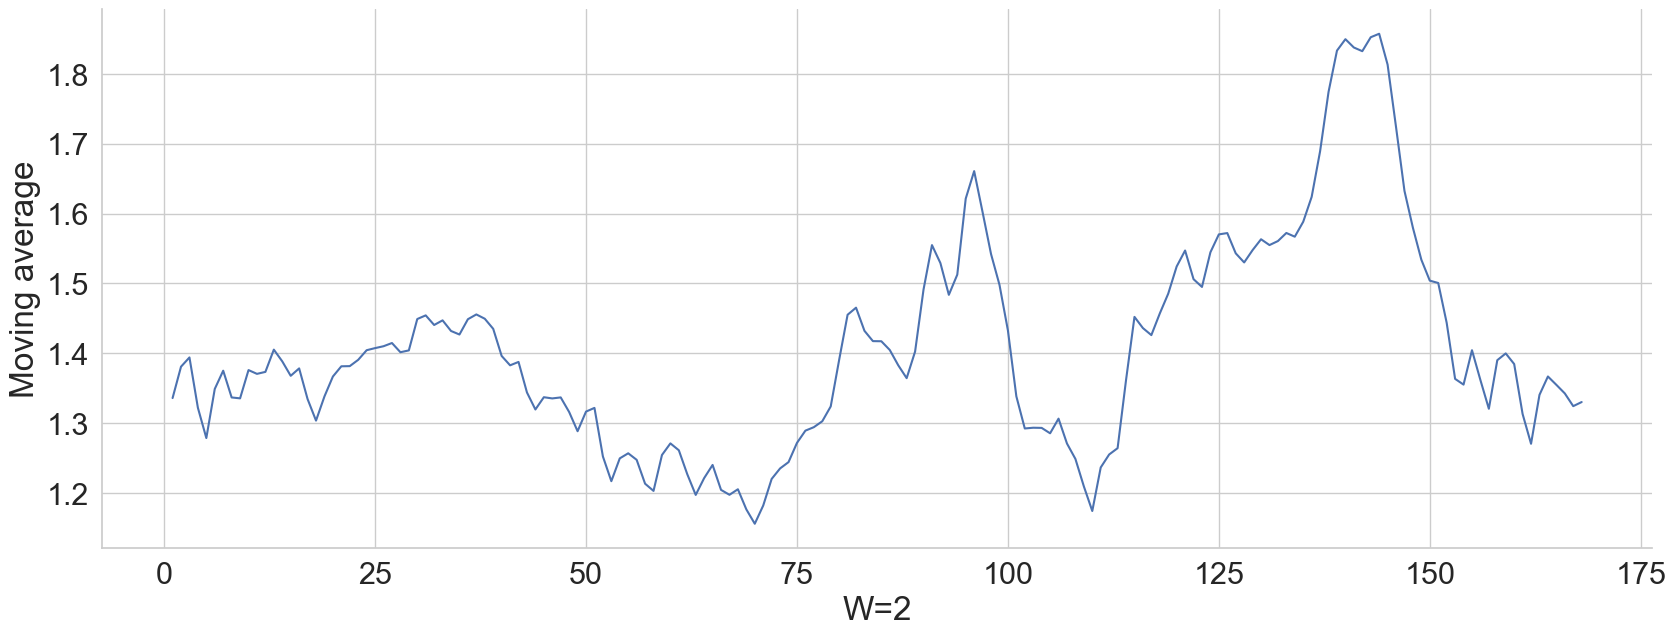

In [77]:
get_plot(df.AveragePrice.rolling(window=2).mean(), "W=2", "Moving average")

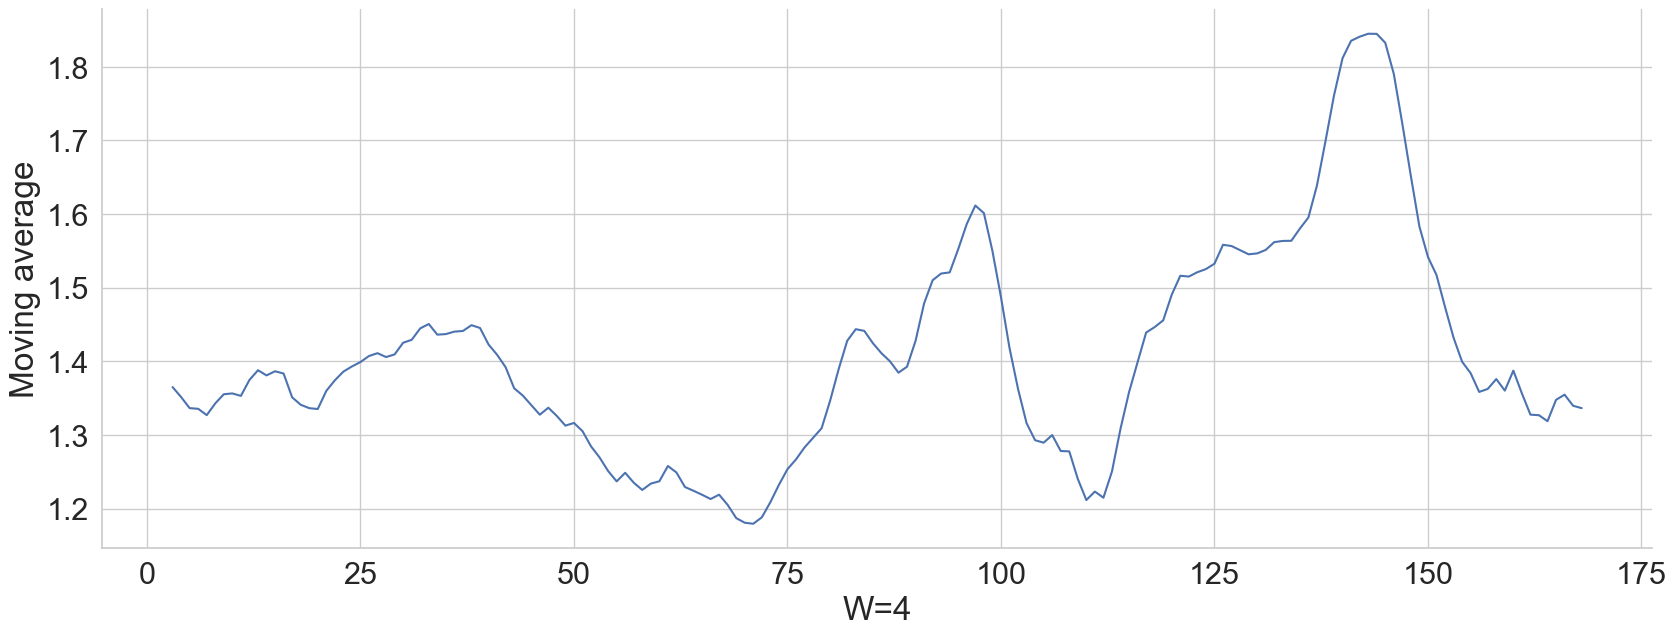

In [78]:
get_plot(df.AveragePrice.rolling(window=4).mean(), "W=4", "Moving average")

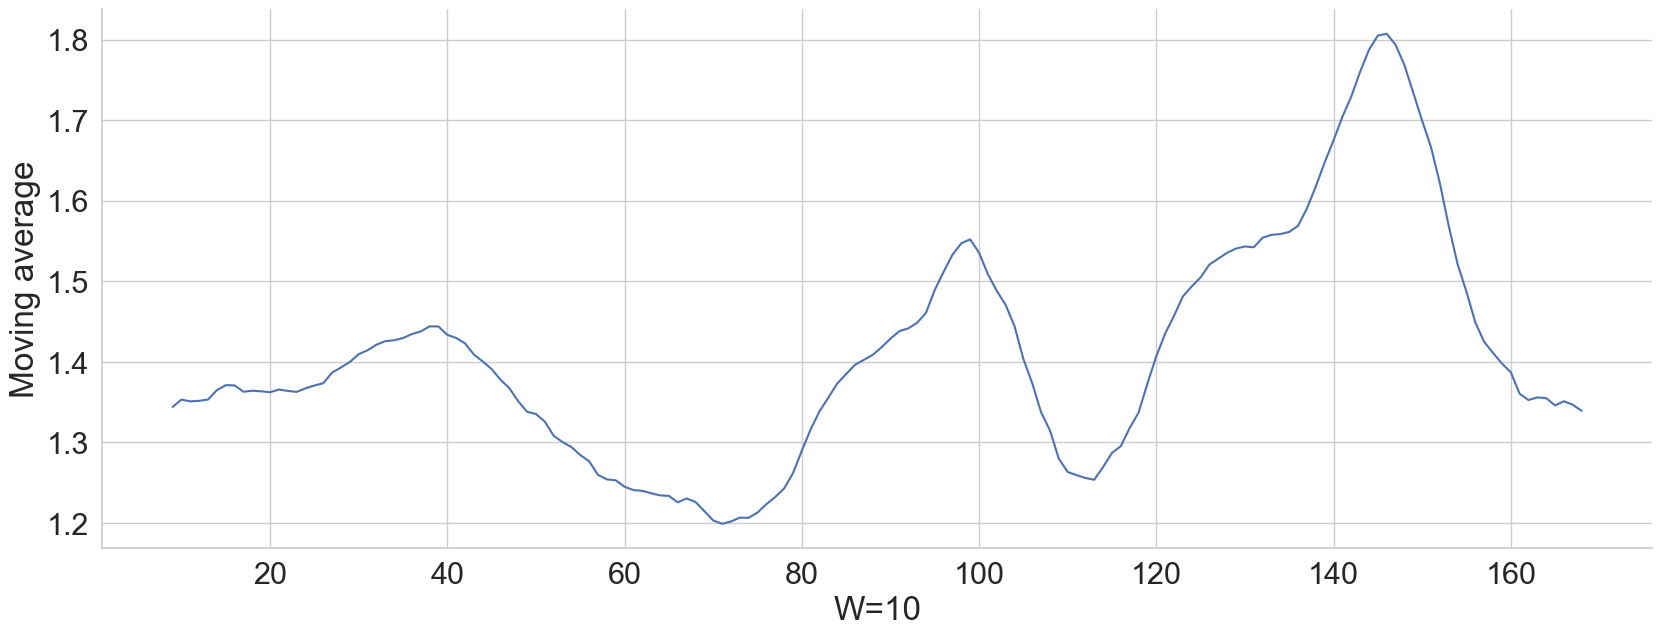

In [79]:
get_plot(df.AveragePrice.rolling(window=10).mean(), "W=10", "Moving average")

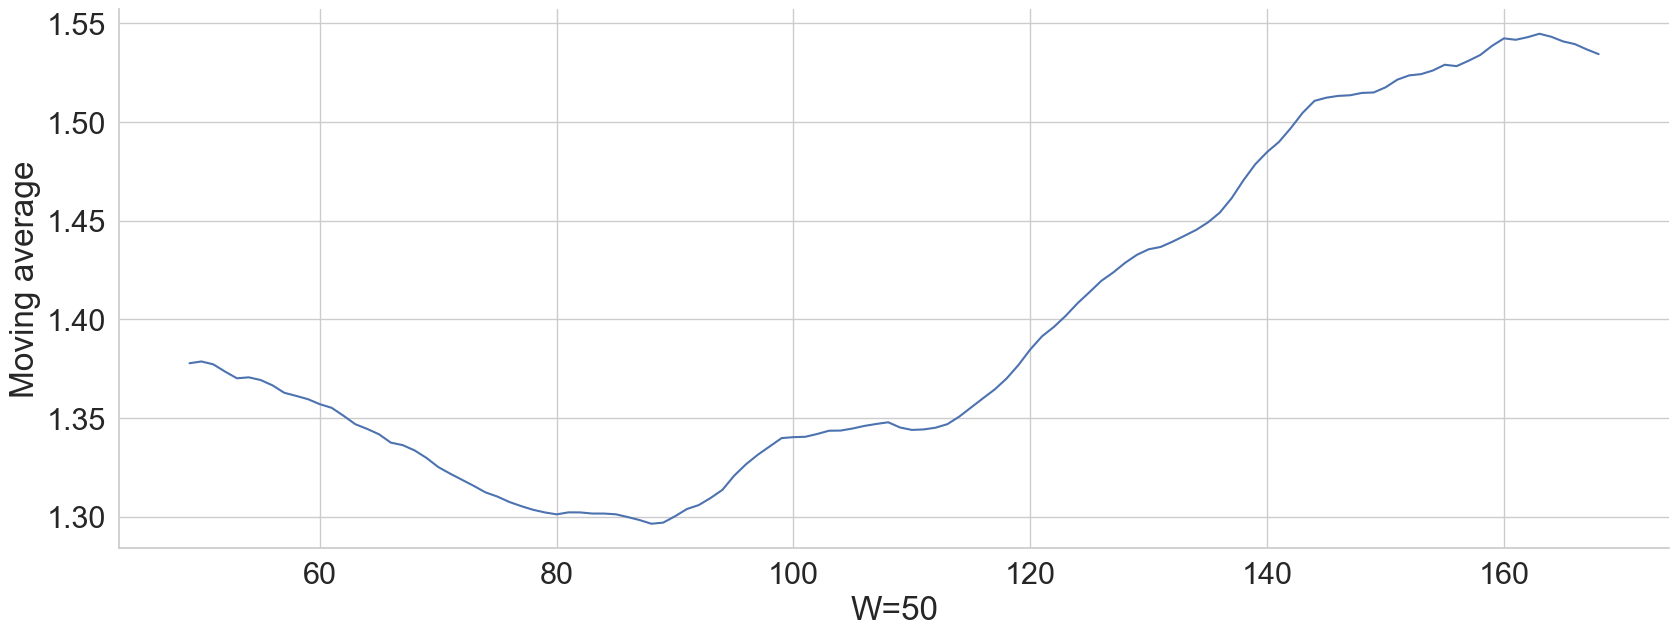

In [80]:
get_plot(df.AveragePrice.rolling(window=50).mean(), "W=50", "Moving average")

In [81]:
# exponential weighted function

In [93]:
avocado_ewm = df.AveragePrice.ewm(span=2).mean()

In [94]:
avocado_ewm.mean()

1.4059345619691976

In [95]:
#upload full data

In [100]:
data = pd.read_csv("C:/Users/Ark/0_ANALYSIS/DA_projects/Untitled Folder/avocado_full.csv", index_col=0)

In [101]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [103]:
# Filter data
data_org_chic = data[(data['type'] == "organic") & (data['region'] == "Chicago")]

In [113]:
data_org_chic = data_org_chic.assign(MA_4 = data_org_chic.AveragePrice.rolling(window = 4).mean(), \
                                     EWM_4 = data_org_chic.AveragePrice.ewm(span = 4).mean()).fillna(0).round(3)

In [115]:
data_org_chic.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,EWM,MA,MA_4,EWM_4
Date,,,,,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.0,0.0,organic,2015,Chicago,1.490,0.000,0.000,1.490
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.0,0.0,organic,2015,Chicago,1.678,0.000,0.000,1.678
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.0,0.0,organic,2015,Chicago,1.745,0.000,0.000,1.745
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.0,0.0,organic,2015,Chicago,1.784,1.730,1.730,1.784
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.0,0.0,organic,2015,Chicago,1.670,1.738,1.738,1.670


<AxesSubplot:xlabel='Date'>

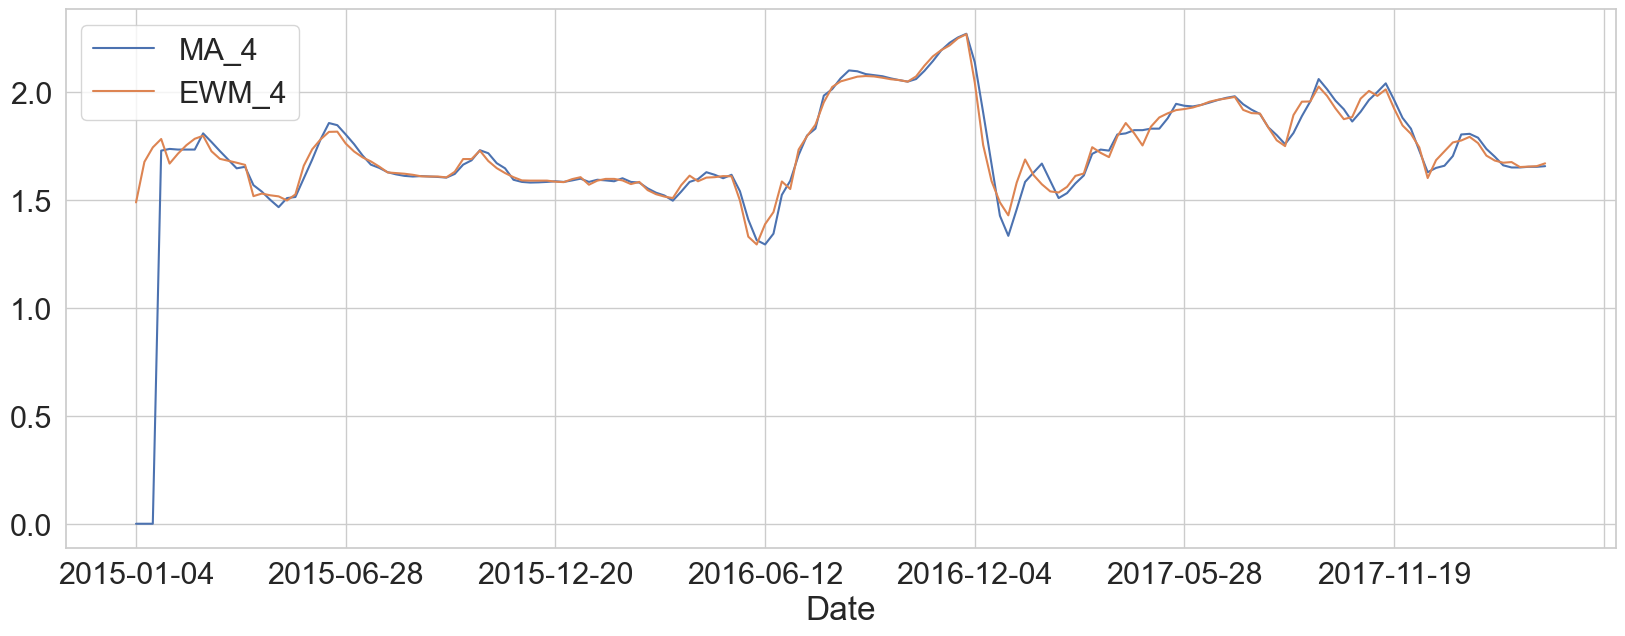

In [117]:
data_org_chic[["MA_4", "EWM_4"]].plot()

In [118]:
#upload additional dataset.
delays = pd.read_csv("C:/Users/Ark/0_ANALYSIS/DA_projects/Untitled Folder/delays.csv")

In [119]:
delays

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


In [120]:
delays.dtypes

client_id      int64
company_id     int64
delay         object
revenue        int64
dtype: object

In [127]:
delays.delay = delays.delay.str.replace("-", "")

In [128]:
#transform "delay" into timedelta format

In [129]:
delays

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48.000000000,705436
1,7614,9544,4 days 02:14:23.000000000,859266
2,2052,2427,0 days 06:08:57.000000000,812416
3,9635,8054,0 days 23:40:19.000000000,162312
4,8154,5503,1 days 13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,0 days 05:32:08.000000000,602129
260,2384,2364,3 days 23:27:14.000000000,910660
261,5146,3331,1 days 15:22:34.000000000,401137
262,7203,5532,2 days 17:15:02.000000000,308979


In [133]:
delays.delay = pd.to_timedelta(delays.delay)

In [135]:
delays.dtypes

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

In [148]:
delays.delay.quantile(q=0.25)

Timedelta('1 days 03:47:39.750000')

In [143]:
delays.delay.mean()

Timedelta('2 days 11:41:29.984848484')

In [144]:
delays.delay.max()

Timedelta('4 days 23:51:14')

In [159]:
# # split the data into three named periods 
# delays['delay_categorical'] = pd.qcut(delays.delay, q=3, labels = ["low", "medium", "high"])

In [174]:
# Alternative
bins_ = pd.to_timedelta(['0d', '1d', '3d', '106751d'])
delays['delay_categorical'] = pd.cut(delays.delay, bins = bins_, \
                                 labels=['less than 1 day', '1-3 days', 'more than 3 days'])

In [175]:
delays

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-3 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-3 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-3 days
262,7203,5532,2 days 17:15:02,308979,1-3 days


In [176]:
order = ['less than 1 day', '1-3 days', 'more than 3 days']
fig = px.bar(delays, x='delay_categorical')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'array', \
                                          'categoryarray':order})
fig.show()